In [115]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers, regularizers
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [116]:
# loading
y = np.genfromtxt('./data/label.csv',delimiter=',')

In [117]:
X = np.genfromtxt('./data/features.csv',delimiter=',')

In [118]:
#splitting
x_train, x_val, y_train, y_val = train_test_split(X,
                                                 y,
                                                 test_size = .2,
                                                 random_state=12)

In [119]:
# resampling the traninging data to change the balnce the data
sm = SMOTE(random_state=12)
x_res, y_res = sm.fit_sample(x_train, y_train)

In [120]:
# turning the array to tensors
y_train_res = tf.convert_to_tensor(y_res, dtype='float32')
x_train_res = tf.convert_to_tensor(x_res, dtype='float32')

In [121]:
X_val = tf.convert_to_tensor(x_val, dtype='float32')
Y_val = tf.convert_to_tensor(y_val, dtype='float32')

In [122]:
# makeing the tensorflow data 
data_train = tf.data.Dataset.from_tensor_slices(
    (x_train_res, y_train_res)

).cache()

data_validate = tf.data.Dataset.from_tensor_slices(
    (X_val, Y_val)).cache()

In [123]:
X[0].shape

(18,)

In [124]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(18, 1, 1)))
model.add(layers.Dense(9, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 18)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 9)                 171       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 10        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [125]:
history = model.fit(data_train.shuffle(10000).batch(32), epochs=30, validation_data=data_validate.batch(32))

Epoch 1/30
574/574 [==============================] - 1s 2ms/step - loss: 0.5974 - accuracy: 0.7110 - val_loss: 0.6267 - val_accuracy: 0.6837
Epoch 2/30
574/574 [==============================] - 1s 1ms/step - loss: 0.4942 - accuracy: 0.7972 - val_loss: 0.5894 - val_accuracy: 0.7280
Epoch 3/30
574/574 [==============================] - 1s 1ms/step - loss: 0.4369 - accuracy: 0.8274 - val_loss: 0.5026 - val_accuracy: 0.7900
Epoch 4/30
574/574 [==============================] - 1s 1ms/step - loss: 0.3836 - accuracy: 0.8543 - val_loss: 0.4335 - val_accuracy: 0.8280
Epoch 5/30
574/574 [==============================] - 1s 1ms/step - loss: 0.3309 - accuracy: 0.8813 - val_loss: 0.3927 - val_accuracy: 0.8407
Epoch 6/30
574/574 [==============================] - 1s 1ms/step - loss: 0.2896 - accuracy: 0.8991 - val_loss: 0.3272 - val_accuracy: 0.8700
Epoch 7/30
574/574 [==============================] - 1s 1ms/step - loss: 0.2572 - accuracy: 0.9117 - val_loss: 0.3214 - val_accuracy: 0.8697
Epoch 

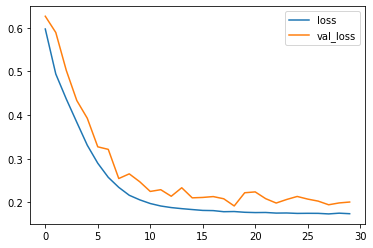

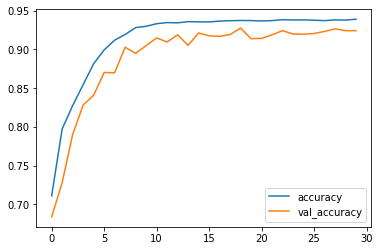

In [126]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.close()

plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.close()